In [ ]:
from tensorflow import keras
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow import keras
import seaborn as sn
from sklearn.manifold import TSNE
from tensorflow.keras.layers import Add, Input, Conv2D, BatchNormalization, Activation, AveragePooling2D, Flatten, Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Model
import numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.datasets import cifar10

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Print the shape of the training and testing datasets
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)


x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [ ]:
# Normalize the data between 1 and 0 (MINMAX scaling)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert the labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [ ]:
# Reshape

# Reshape X_train and X_test
x_trainR = np.reshape(x_train, (50000, 3072))

In [ ]:
# tsne = TSNE()
# VisTrain = tsne.fit_transform(x_trainR[:20000])

# plt.figure(figsize=(10, 8))
# plt.scatter(VisTrain[:,0], VisTrain[:,1], c=y_train[:20000], s=15)

# plt.xticks([])
# plt.yticks([])
# plt.colorbar()


In [ ]:
x_trainR_subset = x_trainR[:3000]
y_train_subset = y_train[:3000]

# Convert the labels to categorical arrays
y_train_cat = to_categorical(y_train_subset)

# Perform t-SNE dimensionality reduction on the subset of images
tsne = TSNE()
vis_train = tsne.fit_transform(x_trainR_subset)

# Visualize the t-SNE embedding
plt.figure(figsize=(10, 8))
plt.scatter(vis_train[:, 0], vis_train[:, 1], c=y_train_cat, s=15)
plt.xticks([])
plt.yticks([])
plt.colorbar()
plt.show()

## Model

In [ ]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

In [ ]:
# Define a function for the learning rate schedule
def lr_schedule(epoch):
    lr = 0.01
    if epoch > 25:
        lr = 0.001
    if epoch > 33:
        lr = 0.0001
    if epoch > 40:  
        lr = 0.00001
    if epoch > 45:  
        lr = 0.000001
    return lr

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.125),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    #MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    #MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(10, activation='softmax')
])

#model.summary()

In [ ]:
#defining the optimizer with its lr and momentum GD
sgd= SGD(lr=0.01, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

# Define the learning rate schedule callback
lr_scheduler= LearningRateScheduler(lr_schedule)

# Train the model
history= model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=64,
                   callbacks=[lr_scheduler])
#history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
#                  steps_per_epoch=x_train.shape[0] // 64,
#                  epochs=50,
#                  validation_data=(x_test, y_test),callbacks=[lr_scheduler])

Epoch 1/50
782/782 [==============================] - 29s 20ms/step - loss: 1.8606 - accuracy: 0.3947 - val_loss: 2.0063 - val_accuracy: 0.3350 - lr: 0.0100
Epoch 2/50
782/782 [==============================] - 15s 19ms/step - loss: 1.3908 - accuracy: 0.5324 - val_loss: 1.0846 - val_accuracy: 0.6184 - lr: 0.0100
Epoch 3/50
782/782 [==============================] - 14s 18ms/step - loss: 1.0376 - accuracy: 0.6420 - val_loss: 0.9706 - val_accuracy: 0.6715 - lr: 0.0100
Epoch 4/50
782/782 [==============================] - 14s 18ms/step - loss: 0.8679 - accuracy: 0.6990 - val_loss: 0.7447 - val_accuracy: 0.7457 - lr: 0.0100
Epoch 5/50
782/782 [==============================] - 15s 19ms/step - loss: 0.7590 - accuracy: 0.7371 - val_loss: 0.7019 - val_accuracy: 0.7532 - lr: 0.0100
Epoch 6/50
782/782 [==============================] - 15s 19ms/step - loss: 0.6688 - accuracy: 0.7708 - val_loss: 0.6328 - val_accuracy: 0.7851 - lr: 0.0100
Epoch 7/50
782/782 [==============================] - 14s 

In [ ]:
#use metrics to print accuracy and f1 score
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

y_true = np.argmax(y_test, axis=1)

accuracy = metrics.accuracy_score(y_true, y_pred)
f1_score = metrics.f1_score(y_true, y_pred, average='macro')

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)
print('Accuracy:', accuracy)
print('F1 score:', f1_score)

313/313 - 2s - loss: 0.6144 - accuracy: 0.8594 - 2s/epoch - 5ms/step
313/313 [==============================] - 1s 4ms/step
Test loss: 0.6144431233406067
Test accuracy: 0.8593999743461609
Accuracy: 0.8594
F1 score: 0.8583797024737079


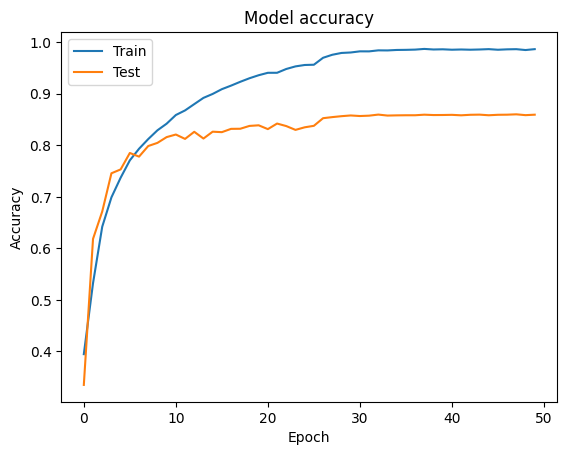

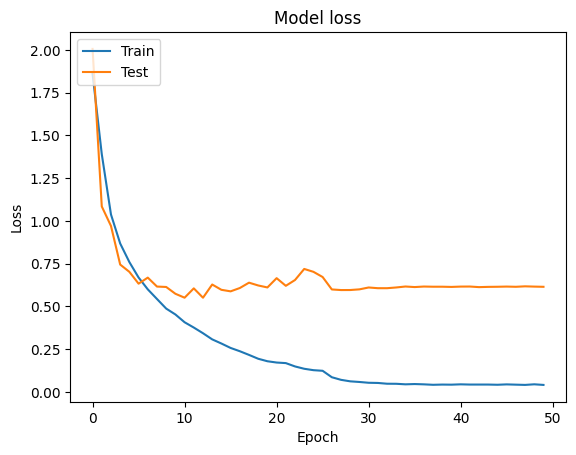

In [ ]:
#visualosing accuracy and loss

#training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
import pickle
# save the model
with open('cifer10_model_86acc.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
from google.colab import files
files.download('cifer10_model_86acc.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
/content/drive/MyDrive/CIFER10 GAN/epoch70_img10.png

## Prediction part

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

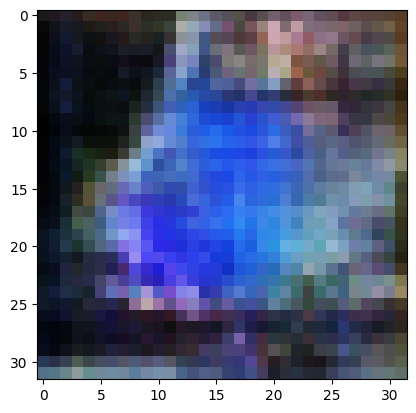

In [ ]:
import cv2
import numpy as np


image_path = '/content/drive/MyDrive/CIFAR10 GAN2/epoch50_img5.png'
image = cv2.imread(image_path)
#Ploting the image
plt.imshow(image)
plt.show()

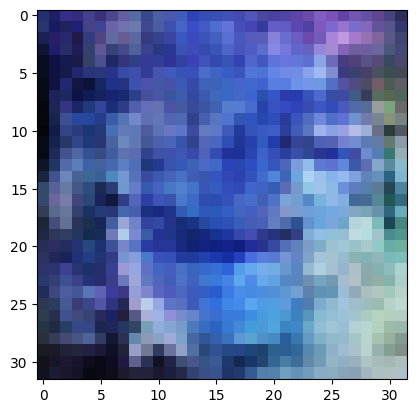

In [ ]:
image_path2 = '/content/drive/MyDrive/CIFAR10 GAN2/epoch50_img6.png'
image2 = cv2.imread(image_path2)
#Ploting the image
plt.imshow(image2)
plt.show()

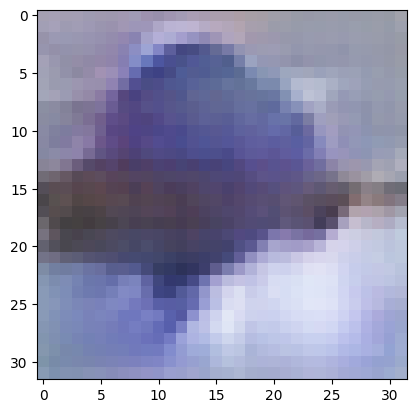

In [ ]:
image_path3 = '/content/drive/MyDrive/CIFER10 GAN/epoch70_img18.png'
image3 = cv2.imread(image_path3)
#Ploting the image
plt.imshow(image3)
plt.show()

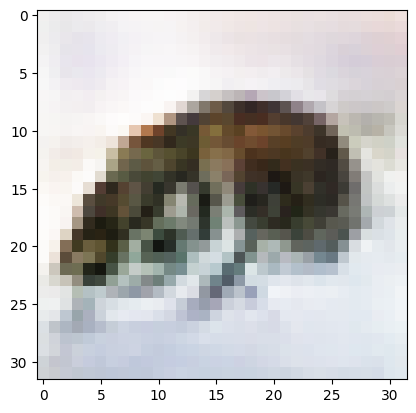

In [ ]:
image_path4 = '/content/drive/MyDrive/CIFER10 GAN/epoch70_img22.png'
image4 = cv2.imread(image_path4)
#Ploting the image
plt.imshow(image4)
plt.show()

In [ ]:
# Preprocess the images
image = cv2.resize(image, (32, 32))
image = np.expand_dims(image, axis=0)
image = image.astype('float32') / 255.0

image2 = cv2.resize(image2, (32, 32))
image2 = np.expand_dims(image2, axis=0)
image2 = image2.astype('float32') / 255.0

image3 = cv2.resize(image3, (32, 32))
image3 = np.expand_dims(image3, axis=0)
image3 = image3.astype('float32') / 255.0

image4 = cv2.resize(image4, (32, 32))
image4 = np.expand_dims(image4, axis=0)
image4 = image3.astype('float32') / 255.0

In [ ]:
#image1
prediction = model.predict(image) #will give probability of each 10 classes
#print(prediction)

pred_class_index = np.argmax(prediction)
pred_class_label = pred_class_index 

predicted_class_name = class_names[pred_class_label]
print('The predicted class label is:', predicted_class_name)

1/1 [==============================] - 0s 19ms/step
The predicted class label is: truck


In [ ]:
#image2
prediction = model.predict(image2) #will give probability of each 10 classes
#print(prediction)

pred_class_index = np.argmax(prediction)
pred_class_label = pred_class_index +1

predicted_class_name = class_names[pred_class_label]
print('The predicted class label is:', predicted_class_name)

1/1 [==============================] - 0s 20ms/step
The predicted class label is: horse


In [ ]:
#image3
prediction = model.predict(image3) #will give probability of each 10 classes
#print(prediction)

pred_class_index = np.argmax(prediction)
pred_class_label = pred_class_index + 1

predicted_class_name = class_names[pred_class_label]
print('The predicted class label is:', predicted_class_name)

1/1 [==============================] - 0s 22ms/step
The predicted class label is: automobile


In [ ]:
#image4
prediction = model.predict(image4) #will give probability of each 10 classes
#print(prediction)

pred_class_index = np.argmax(prediction)
pred_class_label = pred_class_index + 1

predicted_class_name = class_names[pred_class_label]
print('The predicted class label is:', predicted_class_name)

1/1 [==============================] - 0s 20ms/step
The predicted class label is: dog
